# Proyek Pertama - Prediksi Harga Mobil

Nama : Nur Oktavin Idris

Dataset : [kaggle](https://www.kaggle.com/datasets/CooperUnion/cardataset/data)

## Import Library

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load the Dataset

In [66]:
df = pd.read_csv('data.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Dataset berisi informasi tentang kendaraan dengan fitur-fitur berikut:

    

*   Make: Merek mobil.

*    Year: Tahun produksi.

*   Engine Fuel Type: Jenis bahan bakar.

*   Engine HP: Tenaga mesin (Horsepower).

*   Engine Cylinders: Jumlah silinder mesin.

*   Transmission Type: Jenis transmisi.

*   Driven_Wheels: Sistem penggerak roda.
*   Vehicle Size: Ukuran kendaraan.

*   Number of Doors : Jumlah pintu
*   Market Category
*    Vehicle Style: Gaya kendaraan.


*   highway MPG: Efisiensi bahan bakar di jalan raya.


*   city mpg: Efisiensi bahan bakar di dalam kota.


*   Popularity: Popularitas merek mobil.


*    MSRP: Harga kendaraan (Target).


## Data Preprocessing

Menangani Duplikat dan Missing Values

In [68]:
df.duplicated().sum()

715

In [69]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [70]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3376


In [71]:
# Hapus Kolom yang tidak mempengaruhi target (harga/MSRP)
df = df.drop(columns=["Model", "Market Category", "Number of Doors"], errors='ignore')

In [72]:
df.shape

(11199, 13)

Jumlah datasets menjadi 11199 dikarenakan telah menghapus 3 kolom yang tidak relevan dan menghapus data duplikat

In [73]:
df[df.isnull().any(axis=1)]

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,Compact,Wagon,92,120,1720,31950
9854,Kia,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,Compact,Wagon,92,120,1720,35950
11321,Suzuki,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,17199
11322,Suzuki,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,20199


In [74]:
# Menangani Missing Values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

In [75]:
df.isnull().sum()

,0
Make,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Vehicle Size,0
Vehicle Style,0
highway MPG,0


Exploratory Data Analysis

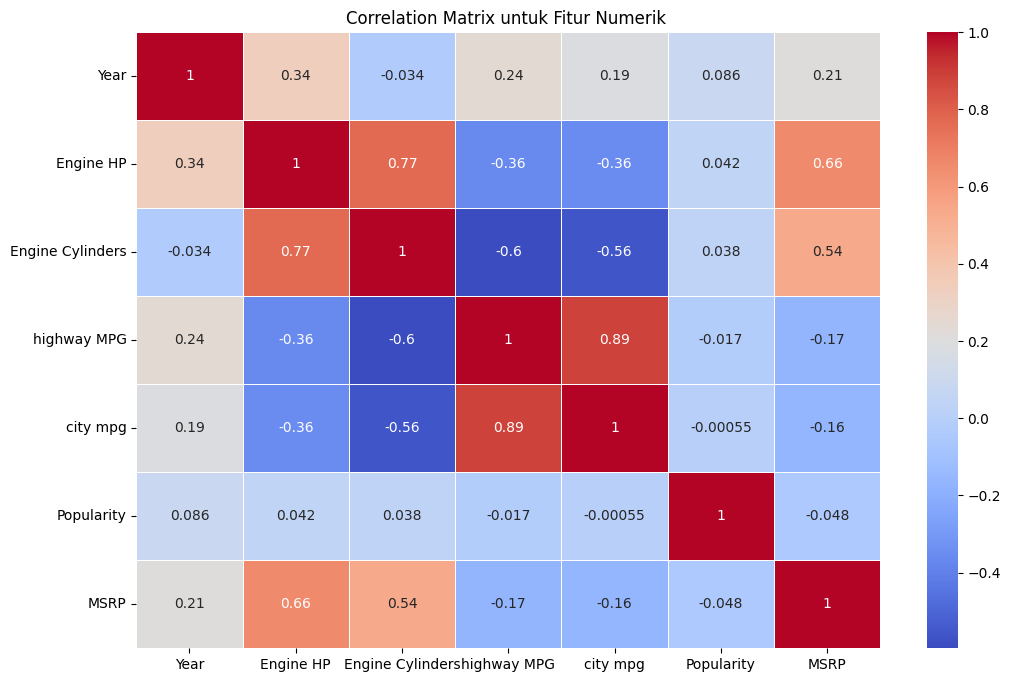

In [76]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ")
plt.show()

<ipython-input-77-f3046e05808d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


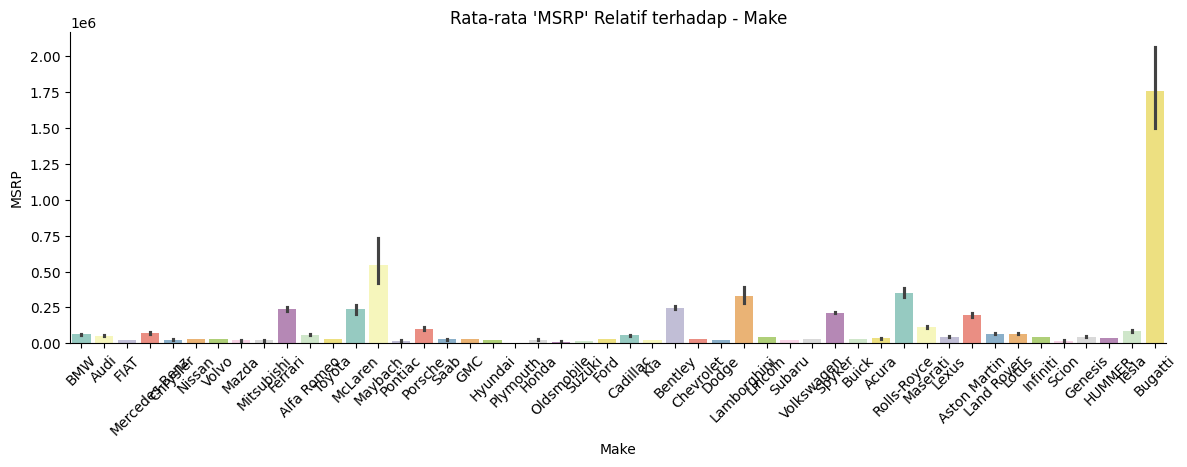

<ipython-input-77-f3046e05808d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


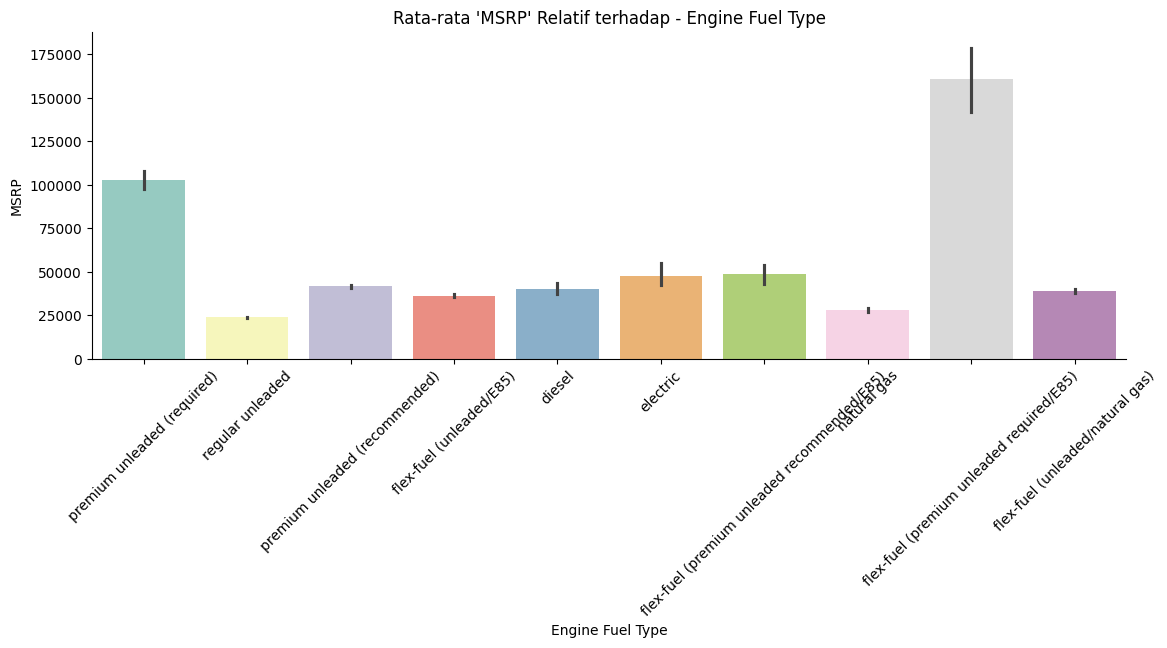

<ipython-input-77-f3046e05808d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


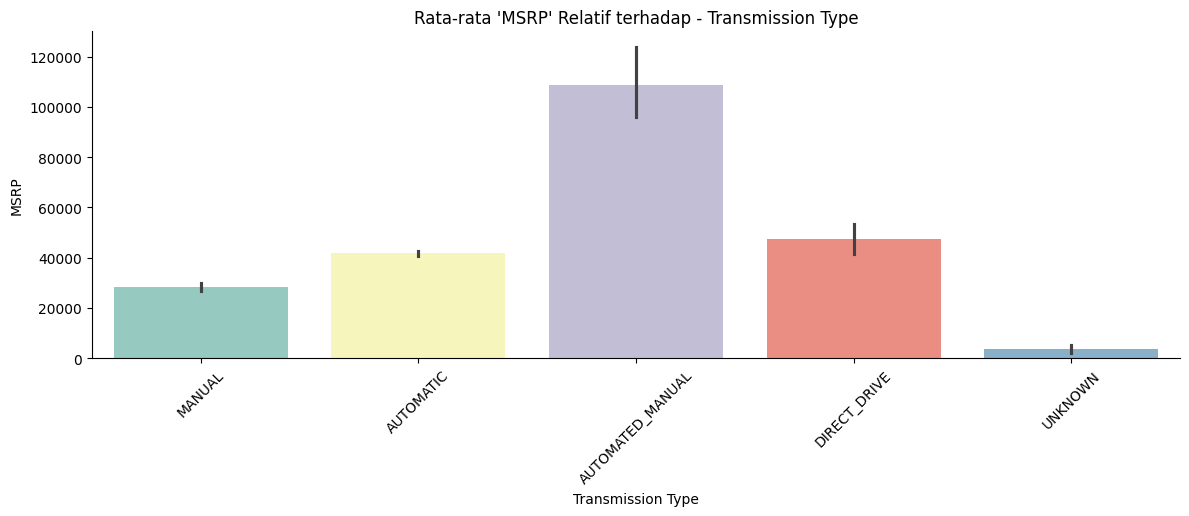

<ipython-input-77-f3046e05808d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


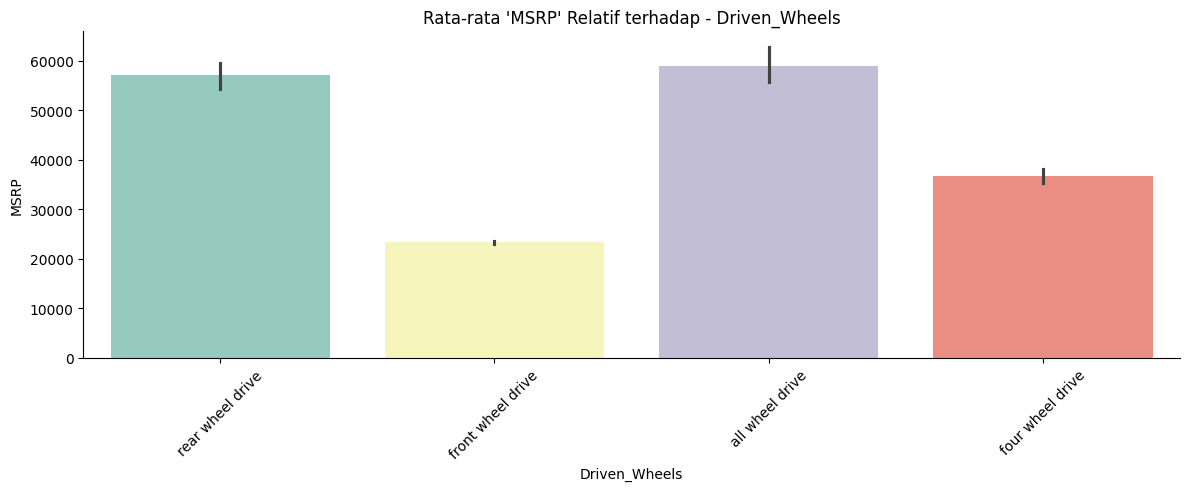

<ipython-input-77-f3046e05808d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


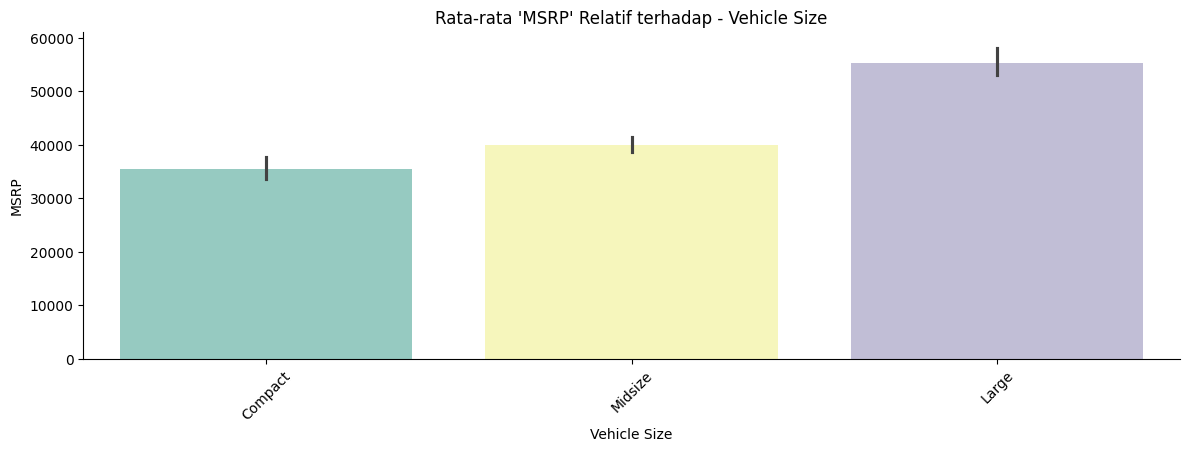

<ipython-input-77-f3046e05808d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


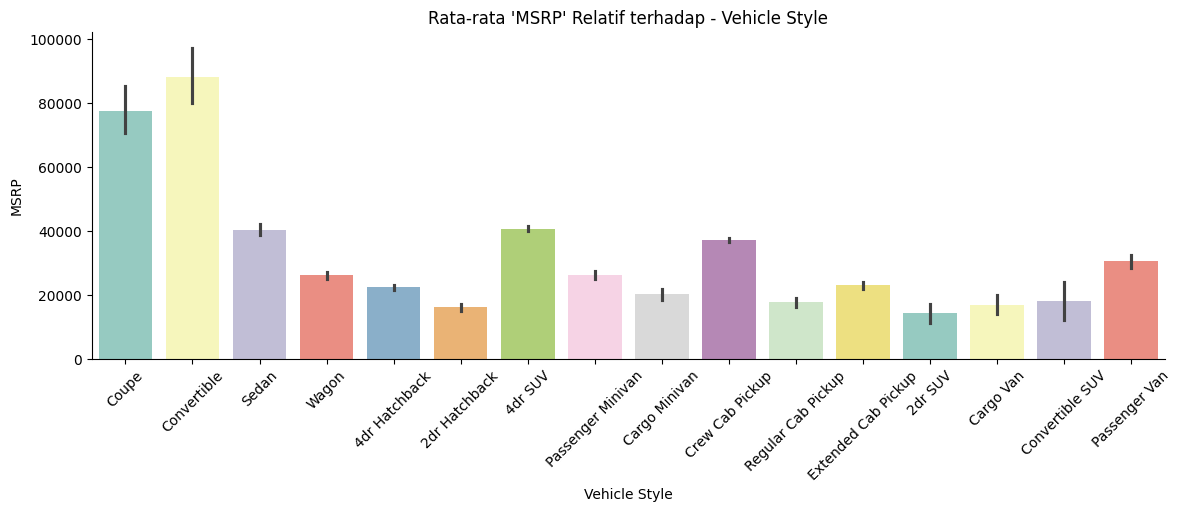

In [77]:
# Melihat kolerasi antara fitur kategorik dengan fitur MSRP (harga)
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="MSRP", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")
  plt.title("Rata-rata 'MSRP' Relatif terhadap - {}".format(col))
  plt.xticks(rotation=45)
  plt.show()

In [78]:
# Memilih fitur yang relevan
fitur = [
    "Make", "Year", "Engine Fuel Type", "Engine HP", "Engine Cylinders",
    "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style",
    "highway MPG", "city mpg", "Popularity"
]
target = "MSRP"

# Split data X (fitur) and y (target)
X = df[fitur]
y = df[target]

## Encoding

In [79]:
categorical_cols = X.select_dtypes(include=["object"]).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

<ipython-input-79-b4d6f0637291>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-79-b4d6f0637291>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-79-b4d6f0637291>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,4,2011,8,335.0,6.0,3,3,0,8,26,19,3916
1,4,2011,8,300.0,6.0,3,3,0,6,28,19,3916
2,4,2011,8,300.0,6.0,3,3,0,8,28,20,3916
3,4,2011,8,230.0,6.0,3,3,0,8,28,18,3916
4,4,2011,8,230.0,6.0,3,3,0,6,28,18,3916


## Normalisasi

In [81]:
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns
X.loc[:, numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [82]:
X.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,-1.311957,0.039496,0.018766,0.743998,0.185641,1.732666,1.149734,-1.119142,-0.075859,-0.068015,-0.079747,1.630817
1,-1.311957,0.039496,0.018766,0.425271,0.185641,1.732666,1.149734,-1.119142,-0.486464,0.154770,-0.079747,1.630817
2,-1.311957,0.039496,0.018766,0.425271,0.185641,1.732666,1.149734,-1.119142,-0.075859,0.154770,0.029219,1.630817
3,-1.311957,0.039496,0.018766,-0.212183,0.185641,1.732666,1.149734,-1.119142,-0.075859,0.154770,-0.188713,1.630817
4,-1.311957,0.039496,0.018766,-0.212183,0.185641,1.732666,1.149734,-1.119142,-0.486464,0.154770,-0.188713,1.630817


## Train-Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Total dataset: {len(X)}')
print(f'Total data latih: {len(X_train)}')
print(f'Total data uji: {len(X_test)}')

Total dataset: 11199
Total data latih: 8959
Total data uji: 2240


## Train the Model

In [84]:
Random_Forest = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 20)
Random_Forest.fit(X_train, y_train)

gradient_boosting = GradientBoostingRegressor(n_estimators=200, max_depth= 5, learning_rate=0.2)
gradient_boosting.fit(X_train, y_train)

linear_regression = LinearRegression(fit_intercept=True, n_jobs=-1)
linear_regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

## Evaluate the Model

In [85]:
y_pred_rf = Random_Forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

y_pred_gb = gradient_boosting.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

y_pred_lr = linear_regression.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

results = pd.DataFrame(columns=['MSE', 'R2 Score'], index=['Random Forest','Gradient Boosting','Linear Regression'])

results.loc['Random Forest', 'MSE'] = mse
results.loc['Random Forest', 'R2 Score'] = r2_rf
results.loc['Gradient Boosting', 'MSE'] = mse_gb
results.loc['Gradient Boosting', 'R2 Score'] = r2_gb
results.loc['Linear Regression', 'MSE'] = mse_lr
results.loc['Linear Regression', 'R2 Score'] = r2_lr
results



,MSE,R2 Score
Random Forest,486169848.307284,0.899657
Gradient Boosting,175063625.591782,0.963868
Linear Regression,2820305019.141654,0.417905


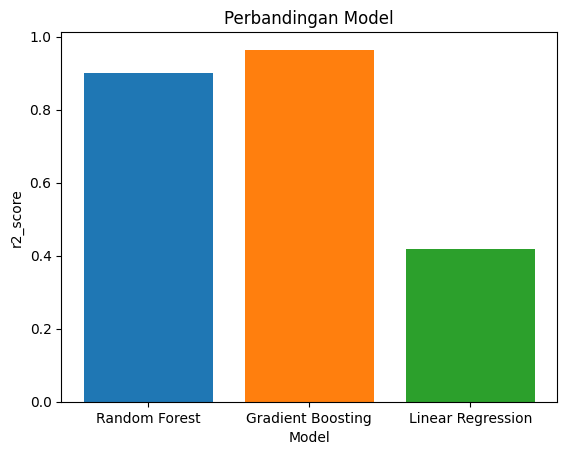

In [86]:
plt.bar('Random Forest', r2_rf)
plt.bar('Gradient Boosting', r2_gb)
plt.bar('Linear Regression', r2_lr)
plt.title("Perbandingan Model");
plt.xlabel('Model');
plt.ylabel('r2_score');
plt.show()

## Predict Prices

In [87]:
# Prediksi data uji dengan model Gradient Boosting
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_gb})
predictions.head()

,Actual,Predicted
0,34160,33757.543796
1,33395,28711.050610
2,19299,18614.209676
3,25195,24488.086357
4,54925,48004.091041
